In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

ROWS = 12000

# CGPA ~ N(7, 0.55)
cgpa = np.random.normal(7, 0.55, ROWS)
cgpa = np.clip(cgpa, 4, 10)
cgpa = np.round(cgpa, 2)

# Left-skewed Marks correlated with CGPA

base_marks = cgpa * 10

# Add negative exponential noise (creates left skew)
neg_noise = -np.random.exponential(scale=7, size=ROWS)

marks = base_marks + neg_noise

# Small normal noise to keep realism
marks += np.random.normal(0, 2, ROWS)

marks = np.clip(marks, 0, 100)
marks = np.round(marks, 2)


# Placement logic
placed = (cgpa >= 6.5).astype(int)

df = pd.DataFrame({
    "cgpa": cgpa,
    "marks": marks,
    "placed": placed
})

# ---------- Controlled Outliers ----------
outliers = pd.DataFrame({
    "cgpa":  [9.8, 1.2, 10, 0.8, 2.0, 9.7],
    "marks": [25, 95, 100, 10, 98, 30],
    "placed":[0, 1, 1, 0, 1, 0]
})

df = pd.concat([df, outliers], ignore_index=True)

df.to_csv("placement_std05.csv", index=False)

print(df.describe())


               cgpa         marks        placed
count  12006.000000  12006.000000  12006.000000
mean       6.995996     62.801772      0.819673
std        0.559861      9.231546      0.384475
min        0.800000      0.000000      0.000000
25%        6.630000     57.860000      1.000000
50%        6.990000     63.860000      1.000000
75%        7.370000     68.990000      1.000000
max       10.000000    100.000000      1.000000


In [ ]:
df.sample(7)

,cgpa,marks,placed
237,7.10,71.10,1
531,6.09,56.40,0
5148,7.41,67.40,1
7090,6.74,60.89,1
6074,7.94,75.12,1
4417,5.93,58.39,0
11647,6.96,67.30,1


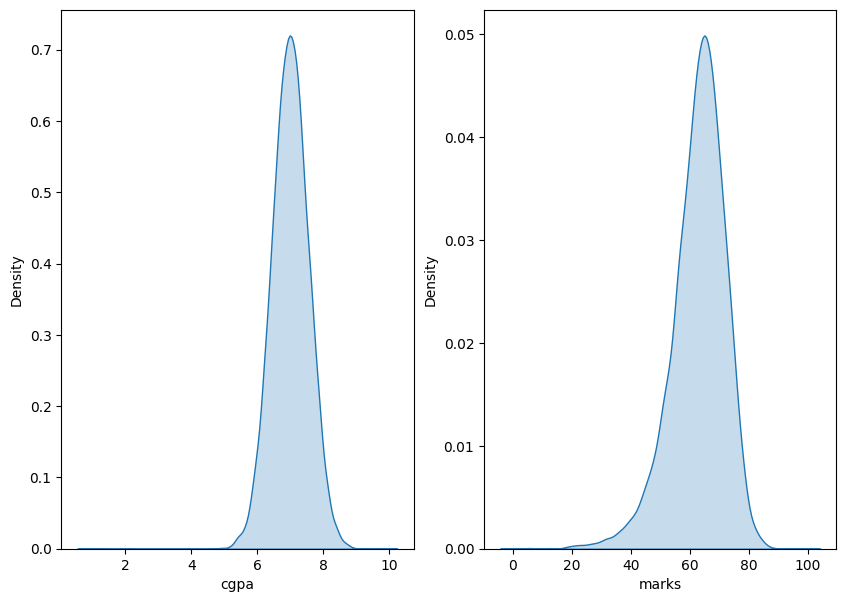

In [ ]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="cgpa", fill=True)

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="marks", fill=True)

plt.show()

In [ ]:
df['marks'].skew()

np.float64(-0.9265932387586705)

In [ ]:
df['cgpa'].skew()

np.float64(-0.23258381213781804)

In [ ]:
df['marks'].describe()

,marks
count,12006.000000
mean,62.801772
std,9.231546
min,0.000000
25%,57.860000
50%,63.860000
75%,68.990000
max,100.000000


<Axes: ylabel='marks'>

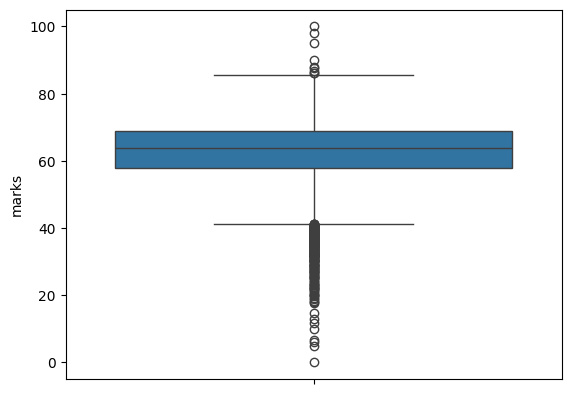

In [ ]:
sns.boxplot(df['marks'])

In [ ]:
# finding the IQR

percentile25 = df['marks'].quantile(0.25)
percentile75 = df['marks'].quantile(0.75)

In [ ]:
percentile25

np.float64(57.86)

In [ ]:
percentile75

np.float64(68.99)

In [ ]:
iqr = percentile75 - percentile25
iqr

np.float64(11.129999999999995)

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print(upper_limit)
print(lower_limit)

85.68499999999999
41.165000000000006


# **finding outliers**

In [ ]:
df[df['marks'] > upper_limit]

,cgpa,marks,placed
209,9.12,86.58,1
478,8.69,86.05,1
1615,8.76,87.48,1
1957,8.73,86.04,1
2895,9.16,89.92,1
4851,8.40,87.90,1
12001,1.20,95.00,1
12002,10.00,100.00,1
12004,2.00,98.00,1


In [ ]:
df[df['marks'] < lower_limit]

,cgpa,marks,placed
4,6.87,33.45,1
53,7.34,30.29,1
74,5.56,21.48,0
92,6.61,40.87,1
216,6.57,30.53,1
...,...,...,...
11953,5.35,38.81,0
11993,6.48,21.66,0
12000,9.80,25.00,0
12003,0.80,10.00,0


In [ ]:
new_df = df[(df['marks'] < upper_limit) & (df['marks'] > lower_limit)]

In [ ]:
new_df

,cgpa,marks,placed
0,7.27,69.11,1
1,6.92,64.40,1
2,7.36,66.27,1
3,7.84,78.23,1
5,6.87,61.23,1
...,...,...,...
11995,6.35,61.29,0
11996,6.96,71.57,1
11997,7.46,75.27,1
11998,6.94,64.87,1


# **capping**

# np.where(condn, true, false)

In [ ]:
new_df_cap = df.copy()

In [ ]:
new_df_cap['marks'] = np.where(new_df_cap['marks'] > upper_limit, upper_limit, np.where(new_df_cap['marks'] < lower_limit, lower_limit, new_df_cap['marks']))

In [ ]:
new_df_cap

,cgpa,marks,placed
0,7.27,69.110,1
1,6.92,64.400,1
2,7.36,66.270,1
3,7.84,78.230,1
4,6.87,41.165,1
...,...,...,...
12001,1.20,85.685,1
12002,10.00,85.685,1
12003,0.80,41.165,0
12004,2.00,85.685,1


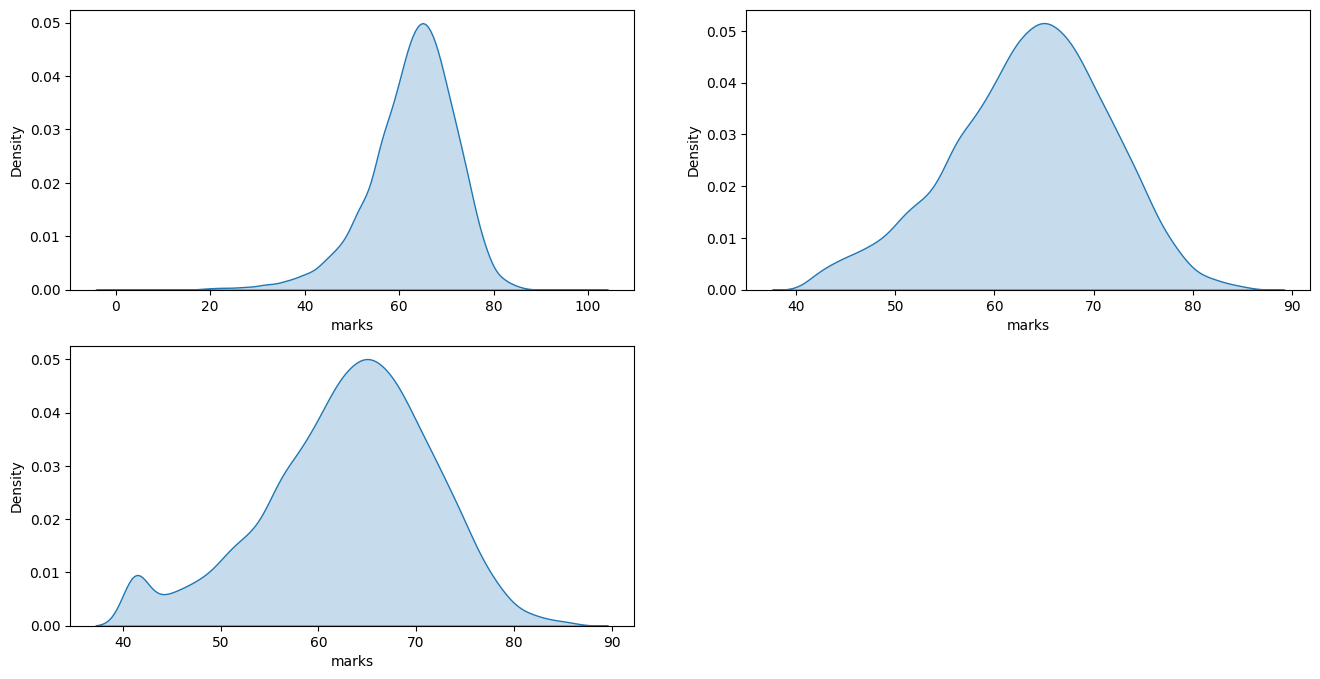

In [ ]:
# comparing

plt.figure(figsize=(16, 8))
plt.subplot(221)
sns.kdeplot(data=df, x="marks", fill=True)

plt.subplot(222)
sns.kdeplot(data=new_df, x="marks", fill=True)

plt.subplot(223)
sns.kdeplot(data=new_df_cap, x="marks", fill=True)

plt.show()
